# COVID-19 Exploratory Analysis - Growth Rate among countries

This notebook analyses growth rates for COVID-19 per country.

COVID-19 cases data from [Our World in Data](www.ourworldindata.org)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import os
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, euclidean
from datetime import datetime


pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


In [2]:
data_dir = '../data/coronavirus/'

source_type = 'growth_rate_deaths'
# source_type = 'growth_rate'

df_orig = pd.read_csv(data_dir + '{}_country_normalized_period_1days.csv'.format(source_type)).set_index('Country')

# df_orig.columns = ['Country', 'Code', 'Day', 'Total']

df_orig

1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42        43        44        45        46       47        48        49       50        51        52        53        54        55        56        57        58        59        60        61        62        63        64        65        66       67        68        69        70        71        72       73        74        75        76       77
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
Albania               1.00  2.000000  1.000000  1.000000  1.000000       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN      NaN
Algeria               1.25  1.200000  1.166667  1.428571  1.000000       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN      NaN
Andorra                NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN       NaN       NaN      NaN       NaN       NaN       NaN      NaN
Argentina             1.00  1.000000  1.000000  1.500000  1.000000  1.333333       NaN       NaN       NaN       Na

## Analysis of correlation


In [3]:
df_orig.T.corr() #.dropna(how='all').dropna(axis=1)

Country                Albania   Algeria  Andorra  Argentina  Armenia  Australia   Austria  Bahrain  Belarus   Belgium    Brazil  Brunei  Bulgaria    Canada  Chile     China  Colombia  Costa Rica  Croatia  Cyprus  Czech Republic   Denmark   Ecuador     Egypt  Estonia  Faeroe Islands  Finland    France   Germany    Greece   Hungary  Iceland     India  Indonesia      Iran      Iraq   Ireland  Israel     Italy     Japan  Jordan  Kazakhstan  Kuwait  Latvia   Lebanon  Lithuania  Luxembourg  Macedonia  Malaysia  Malta  Mexico  Moldova   Morocco  Netherlands  New Zealand    Norway  Pakistan    Panama  Peru  Philippines    Poland  Portugal  Qatar  Romania  Russia  San Marino  Saudi Arabia  Serbia  Singapore  Slovakia  Slovenia  South Africa  South Korea     Spain  Sri Lanka    Sweden  Switzerland    Taiwan  Thailand  Tunisia    Turkey  United Arab Emirates  United Kingdom  United States  Uruguay  Vietnam
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
Albania               1.000000 -0.032742      NaN  -0.250000      NaN  -0.250000       NaN      NaN      NaN       NaN       NaN     NaN -0.250000       NaN    NaN       NaN       NaN   -0.500000      NaN     NaN             NaN       NaN  0.128037 -0.250000      NaN             NaN      NaN -0.395285       NaN       NaN -0.250000      NaN       NaN   1.000000 -0.288869       NaN  1.000000     NaN  0.915736       NaN     NaN         NaN     NaN     NaN       NaN        NaN   -0.490990        NaN       NaN    NaN     NaN      NaN  1.000000    -0.406181          NaN       NaN       NaN -0.250000   NaN    -0.407309 -0.557370       NaN    NaN      NaN     NaN    0.655170           NaN     NaN        NaN       NaN       NaN           NaN     0.261589       NaN        NaN       NaN    -0.333333       NaN       NaN      NaN  0.999109                   NaN             NaN            NaN      NaN      NaN
Algeria              -0.032742  1.000000      NaN   0.794431      NaN  -0.153372       NaN      NaN      NaN       NaN       NaN     NaN  0.794431       NaN    NaN       NaN       NaN   -0.597814      NaN     NaN             NaN       NaN  0.801155 -0.153372      NaN             NaN      NaN  0.356941       NaN       NaN  0.794431      NaN -0.127257  -0.032742  0.148902  0.292552 -0.032742     NaN -0.239988       NaN     NaN         NaN     NaN     NaN -0.166945        NaN    0.394476        NaN       NaN    NaN     NaN      NaN -0.114708    -0.257674          NaN       NaN       1.0 -0.756519   NaN     0.008718  0.456018       NaN    NaN      NaN     NaN   -0.371348           NaN     NaN        NaN       NaN       NaN           NaN     0.051065       NaN        NaN       NaN     0.868339       NaN       NaN      NaN -0.356207                   NaN        0.606143            NaN      NaN      NaN
Andorra                    NaN       NaN      NaN        NaN      NaN        NaN       NaN      NaN      NaN       NaN       NaN     NaN       NaN       NaN    NaN       NaN       NaN         NaN      NaN     NaN             NaN       NaN       NaN       NaN      NaN             NaN      NaN       NaN       NaN       NaN       NaN      NaN       NaN        N

## Country Analysis

The graphs below show the weekly growth rates for all countries. Line colors are based on the average temperatures (red -> warmer).

Colder countries seem to have, in general, higher rates.

In [4]:
country = 'Brazil'

total_days = int(df_orig.loc[country,].last_valid_index())

df_countries_ahead = df_orig.iloc[:, 0:total_days + 7]

df_countries_ahead[~df_countries_ahead.iloc[:, total_days + 7 - 1].isna()]

1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17
Country                                                                                                                                                                             
Australia       1.00  1.000000  1.500000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.666667  1.000000  1.000000  1.200000  1.000000  1.166667  1.000000
Bahrain          NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  1.000000  1.000000  1.000000  1.000000  1.000000
China            NaN       NaN       NaN       NaN       NaN       NaN  1.000000  1.000000  1.000000  2.000000  1.000000  1.000000  1.000000  1.500000  1.000000  2.000000  2.833333
France          1.00  1.000000  1.500000  1.333333  1.000000  1.750000  1.285714  1.111111  1.900000  1.578947  1.100000  1.454545  1.270833  1.295082  1.151899  1.395604  1.165354
Germany          NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  1.000000  1.500000  1.666667  1.000000  1.600000  1.500000  1.083333
Iran            1.25  1.266667  1.368421  1.307692  1.264706  1.255814  1.222222  1.166667  1.194805  1.163043  1.158879  1.169355  1.337931  1.221649  1.227848  1.216495  1.211864
Italy           1.00  3.000000  1.833333  1.090909  1.416667  1.235294  1.380952  1.206897  1.485714  1.538462  1.337500  1.383178  1.331081  1.182741  1.570815  1.267760  1.359914
Japan           1.00  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  3.000000  1.000000  1.000000  1.666667  1.200000  1.000000  1.000000
Malaysia         NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  1.000000  1.000000  1.000000  2.000000
Norway           NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN  1.000000  1.000000  1.000000  3.000000  1.000000  1.000000  2.000000  1.166667  1.000000
South Korea      NaN  2.000000  2.500000  1.400000  1.142857  1.375000  1.090909  1.083333  1.230769  1.062500  1.294118  1.272727  1.142857  1.093750  1.200000  1.047619  1.136364
Spain            NaN       NaN       NaN       NaN  3.000000  1.666667  1.000000  1.000000  5.600000  1.250000  1.342857  1.787234  1.440476  1.123967  2.117647  1.072917  1.588997
Switzerland      NaN  1.000000  1.000000  2.000000  1.000000  1.500000  1.333333  1.000000  1.750000  1.571429  1.181818  1.076923  1.357143  1.105263  1.571429  1.303030  1.302326
United Kingdom   NaN       NaN  1.000000  2.000000  1.500000  1.666667  1.200000  1.000000  1.666667  1.000000  2.100000  1.666667  1.571429  1.090909  1.716667  1.398058  1.229167
United States    NaN       NaN       NaN       NaN       NaN  2.000000  3.000000  1.500000  1.222222  1.090909  1.166667  1.214286  1.235294  1.238095  1.076923  1.071429  1.333333

In [5]:


total_previous_days = 3

df_countries_ahead = df_orig.iloc[:, 0:total_days + 7]

df_countries_ahead = df_countries_ahead[~df_countries_ahead.iloc[:, total_days + 7 - 1].isna()] #df_orig.iloc[:, 0:total_days + 7].dropna()

df_countries_rate_norm = df_orig.iloc[:, total_days - total_previous_days:total_days].dropna()

df_countries_rate_norm = df_countries_rate_norm.loc[df_countries_ahead.index, :]

df_countries_rate_norm = df_countries_rate_norm.append(df_orig.loc[country,][total_days - total_previous_days:total_days])

df_countries_rate_norm

/home/luizcelso/bin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


8         9        10
Country                                     
Australia       1.000000  1.000000  1.000000
Bahrain              NaN       NaN       NaN
China           1.000000  1.000000  2.000000
France          1.111111  1.900000  1.578947
Germany              NaN       NaN       NaN
Iran            1.166667  1.194805  1.163043
Italy           1.206897  1.485714  1.538462
Japan           1.000000  1.000000  1.000000
Malaysia             NaN       NaN       NaN
Norway               NaN       NaN       NaN
South Korea     1.083333  1.230769  1.062500
Spain           1.000000  5.600000  1.250000
Switzerland     1.000000  1.750000  1.571429
United Kingdom  1.000000  1.666667  1.000000
United States   1.500000  1.222222  1.090909
Brazil          1.500000  1.833333  1.636364

In [6]:
distances = pd.DataFrame(
    squareform(pdist(df_countries_rate_norm)),
    columns = df_countries_rate_norm.index,
    index = df_countries_rate_norm.index
)

similar_countries = distances[country].sort_values()

similar_countries

Country
Brazil            0.000000
France            0.398717
Italy             0.465117
Switzerland       0.511039
United States     0.819132
United Kingdom    0.826279
Iran              0.861894
South Korea       0.930599
China             1.037630
Australia         1.161638
Japan             1.161638
Spain             3.819300
Bahrain                NaN
Germany                NaN
Malaysia               NaN
Norway                 NaN
Name: Brazil, dtype: float64

In [7]:
top = 6 # number of similar countries to plot

df_total_cases = pd.read_csv(data_dir + 'total_cases_normalized.csv').set_index('Country')


df_total_cases_top = df_total_cases.loc[similar_countries.head(top).index,:]

df_total_cases_top

Code  Day  Total  TotalDeaths  DayNorm
Country                                              
Brazil          BRA   51     52            0        0
Brazil          BRA   52     77            0        1
Brazil          BRA   53     98            0        2
Brazil          BRA   54    121            0        3
Brazil          BRA   55    200            0        4
Brazil          BRA   56    234            0        5
Brazil          BRA   57    291            1        6
Brazil          BRA   58    428            4        7
Brazil          BRA   59    621            6        8
Brazil          BRA   60    904           11        9
Brazil          BRA   61   1128           18       10
France          FRA   39     57            2        0
France          FRA   40    100            2        1
France          FRA   41    130            2        2
France          FRA   42    178            3        3
France          FRA   43    212            4        4
France          FRA   44    285            4        5
France          FRA   45    423            7        6
France          FRA   46    613            9        7
France          FRA   47    716           10        8
France          FRA   48   1126           19        9
France          FRA   49   1412           30       10
France          FRA   50   1784           33       11
France          FRA   51   2281           48       12
France          FRA   52   2876           61       13
France          FRA   53   3661           79       14
France          FRA   54   4499           91       15
France          FRA   55   5423          127       16
France          FRA   56   6633          148       17
France          FRA   57   7730          175       18
France          FRA   58   9134          244       19
France          FRA   59  10995          372       20
France          FRA   60  12612          450       21
France          FRA   61  14459          562       22
Italy           ITA   33     79            2        0
Italy           ITA   34    132            2        1
Italy           ITA   35    229            6        2
Italy           ITA   36    322           11        3
Italy           ITA   37    400           12        4
Italy           ITA   38    650           17        5
Italy           ITA   39    888           21        6
Italy           ITA   40   1128           29        7
Italy           ITA   41   1689           35        8
Italy           ITA   42   1835           52        9
Italy           ITA   43   2502           80       10
Italy           ITA   44   3089          107       11
Italy           ITA   45   3858          148       12
Italy           ITA   46   4636          197       13
Italy           ITA   47   5883          233       14
Italy           ITA   48   7375          366       15
Italy           ITA   49   9172          464       16
Italy           ITA   50  10149          631       17
Italy           ITA   51  12462          827       18
Italy           ITA   52  15113         1016       19
Italy           ITA   53  17660         1268       20
Italy           ITA   54  17750         1441       21
Italy           ITA   55  23980         1811       22
Italy           ITA   56  27980         2158       23
Italy           ITA   57  31506         2505       24
Italy           ITA   58  35713         2978       25
Italy           ITA   59  41035         3407       26
Italy           ITA   60  47021         4032       27
Italy           ITA   61  53578         4827       28
Switzerland     CHE   44     57            0        0
Switzerland     CHE   45     87            1        1
Switzerland     CHE   46    209            1        2
Switzerland     CHE   47    264            1        3
Switzerland     CHE   48    332            2        4
Switzerland     CHE   49    374            2        5
Switzerland     CHE   50    490            3        6
Switzerland     CHE   51    642            4        7
Switzerland     CHE   52    854            4        8
Switzerland     CHE

In [8]:
fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(x="DayNorm", y='Total', hue="Country", lw = 5, alpha = 0.8, data=df_total_cases_top.reset_index())



In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x="DayNorm", y='TotalDeaths', hue="Country", style="Country", lw = 5, alpha = 0.8, data=df_total_cases_top.reset_index())

ax.set_yscale('log')

In [10]:
df_total_cases_top.sort_index()

Code  Day  Total  TotalDeaths  DayNorm
Country                                              
Brazil          BRA   51     52            0        0
Brazil          BRA   60    904           11        9
Brazil          BRA   59    621            6        8
Brazil          BRA   58    428            4        7
Brazil          BRA   57    291            1        6
Brazil          BRA   61   1128           18       10
Brazil          BRA   55    200            0        4
Brazil          BRA   54    121            0        3
Brazil          BRA   53     98            0        2
Brazil          BRA   52     77            0        1
Brazil          BRA   56    234            0        5
France          FRA   52   2876           61       13
France          FRA   61  14459          562       22
France          FRA   60  12612          450       21
France          FRA   59  10995          372       20
France          FRA   58   9134          244       19
France          FRA   57   7730          175       18
France          FRA   56   6633          148       17
France          FRA   55   5423          127       16
France          FRA   54   4499           91       15
France          FRA   53   3661           79       14
France          FRA   50   1784           33       11
France          FRA   51   2281           48       12
France          FRA   41    130            2        2
France          FRA   48   1126           19        9
France          FRA   47    716           10        8
France          FRA   46    613            9        7
France          FRA   45    423            7        6
France          FRA   44    285            4        5
France          FRA   43    212            4        4
France          FRA   42    178            3        3
France          FRA   40    100            2        1
France          FRA   39     57            2        0
France          FRA   49   1412           30       10
Italy           ITA   52  15113         1016       19
Italy           ITA   51  12462          827       18
Italy           ITA   49   9172          464       16
Italy           ITA   53  17660         1268       20
Italy           ITA   50  10149          631       17
Italy           ITA   54  17750         1441       21
Italy           ITA   60  47021         4032       27
Italy           ITA   56  27980         2158       23
Italy           ITA   57  31506         2505       24
Italy           ITA   58  35713         2978       25
Italy           ITA   59  41035         3407       26
Italy           ITA   61  53578         4827       28
Italy           ITA   55  23980         1811       22
Italy           ITA   48   7375          366       15
Italy           ITA   34    132            2        1
Italy           ITA   46   4636          197       13
Italy           ITA   33     79            2        0
Italy           ITA   47   5883          233       14
Italy           ITA   36    322           11        3
Italy           ITA   37    400           12        4
Italy           ITA   38    650           17        5
Italy           ITA   39    888           21        6
Italy           ITA   35    229            6        2
Italy           ITA   41   1689           35        8
Italy           ITA   42   1835           52        9
Italy           ITA   43   2502           80       10
Italy           ITA   44   3089          107       11
Italy           ITA   45   3858          148       12
Italy           ITA   40   1128           29        7
Switzerland     CHE   54   1359           11       10
Switzerland     CHE   61   6077           56       17
Switzerland     CHE   60   4840           43       16
Switzerland     CHE   59   3888           33       15
Switzerland     CHE   58   3010           21       14
Switzerland     CHE   57   2650           19       13
Switzerland     CHE   56   2200           14       12
Switzerland     CHE   55   2200           13       11
Switzerland     CHE   53   1121            7        9
Switzerland     CHE

In [11]:
date = datetime.today().strftime('%Y-%m-%d')

date

'2020-03-23'

(1, 1124)

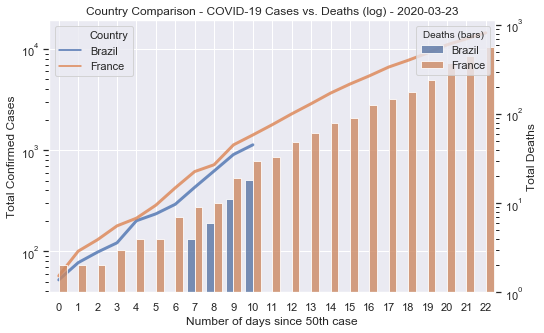

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title('Country Comparison - COVID-19 Cases vs. Deaths (log) - ' + date)

countries_to_show = similar_countries.iloc[:2].keys()

ax = sns.lineplot(x="DayNorm", y='Total', hue="Country", lw = 3, alpha = 0.8, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

ax.set_yscale('log')

ax.set(ylabel='Total Confirmed Cases', xlabel='Number of days since 50th case')

ax2 = plt.twinx()

ax2.set_yscale('log')

ax2.grid(False)

sns.barplot(x="DayNorm", y='TotalDeaths', hue="Country", alpha = 0.8, ax=ax2, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

ax2.legend(loc='upper right', frameon=True)

ax2.legend(loc='upper right', title = "Deaths (bars)", frameon=True)

ax2.set(ylabel='Total Deaths')

max_deaths = df_total_cases_top.loc[countries_to_show,:]['TotalDeaths'].max()

ax2.set_ylim(1, max_deaths * 2)

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_title('Country Comparison - COVID-19 Cases vs. Deaths - ' + date)

countries_to_show = similar_countries.iloc[:2].keys()

ax = sns.lineplot(x="DayNorm", y='Total', hue="Country", lw = 3, alpha = 0.8, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

# ax.set_yscale('log')

ax.set(ylabel='Total Confirmed Cases', xlabel='Number of days since 50th case')

ax2 = plt.twinx()

# ax2.set_yscale('log')

ax2.grid(False)

sns.barplot(x="DayNorm", y='TotalDeaths', hue="Country", alpha = 0.8, ax=ax2, data=df_total_cases_top.loc[countries_to_show,:].reset_index())

ax2.legend(loc='upper right', title = "Deaths (bars)", frameon=True)

ax2.set(ylabel='Total Deaths')

# ax2.set_ylim(0, max_deaths * 1.1)

[Text(0, 0.5, 'Total Deaths')]